In [1]:
primes = [37, 163, 263, 1009]
ffs = []

for p in primes:
    ff = GF(p)
    ffs.append(ff)

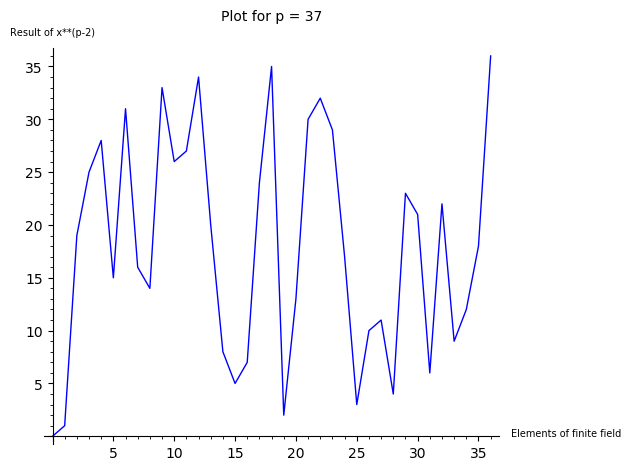

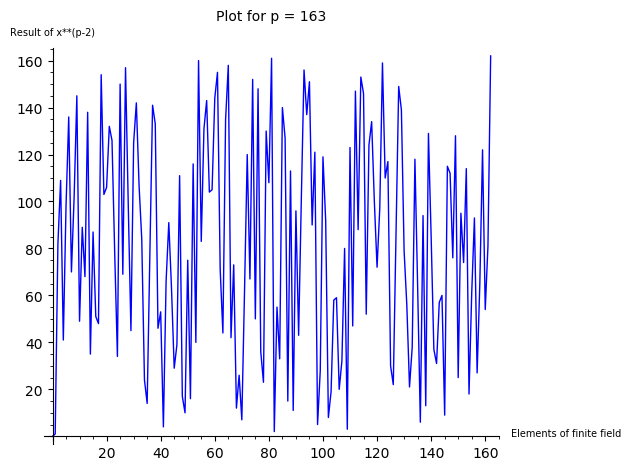

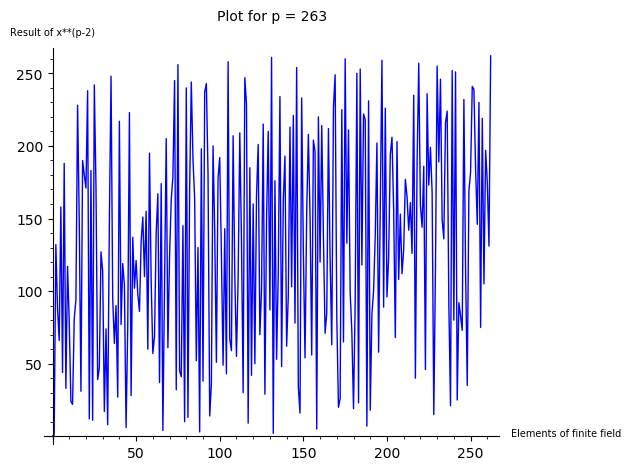

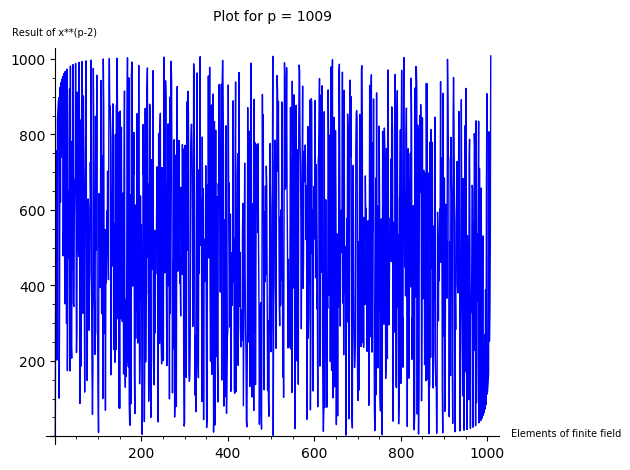

In [2]:
x = var('x')
for i,p in enumerate(primes):
    ff = ffs[i]
    values = []
    for i in range(p):
        values.append((i,ff(i)**(p-2)))
    show(line(values), axes_labels=['Elements of finite field', 'Result of x**(p-2)'], 
         axes_labels_size=0.7, title='Plot for p = ' + str(p))

In [3]:
from random import sample

for ff in ffs:
    primitive = True
    p = int(ff.characteristic())
    g = ff.primitive_element()
    n_exps_random = sample(range(10000000), k=10000)
    for n in n_exps_random:
        fst_cond = g**n == 1
        snd_cond = 0 == n % (p-1)
        if fst_cond != snd_cond:
            primitive = False
    if primitive:
        print(str(g) + ' is a primitive element')
    else:
        print(str(g) + ' is not a primitive element')  

2 is a primitive element
2 is a primitive element
5 is a primitive element
11 is a primitive element
